In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import cv2
import os
from CameraProcessing import CameraDataProccesing
from CameraProcessing import LidarDataProccesing
from CameraProcessing import PinholeCamera

In [2]:
#2021-15-04-14-05-09
date = "2021-15-04-14-25-17" #"2021-08-03-19-10-29"

In [3]:

path_lidar_data = f"D:/Users/user/PycharmProjects/Course/record_data/lidar_record/{date}/"
path_lidar_orientation_data = f"D:/Users/user/PycharmProjects/Course/record_data/lidar_record/{date}/lidar_record.txt"
path_image_data = f"D:/Users/user/PycharmProjects/Course/record_data/image_record/{date}/"
path_word_data = "D:/Users/user/PycharmProjects/Course/world.dat"
path_chess_board = "D:/Users/user/PycharmProjects/Course/chess_board_images_2/"
path_chess_board_pos = "D:/Users/user/PycharmProjects/Course/ChessBoard_pos.dat"


In [4]:
# Можно map использовать 
def null_transform(image):
    # image = cv2.resize(image,(256,144),interpolation=cv2.INTER_AREA)
    image = cv2.normalize(image,None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    #image = image[100:,:]
    return image
def read_image(image_name):
    image = cv2.imread(path_images + image_name)
    images.append(image)
def read_images(path_images,list_image):
    images = []
    for image_name in list_image:
        image = cv2.imread(os.path.join(path_images,image_name))
        image = null_transform(image)
        images.append(image)
    return images


In [5]:
lidar_data = []
for name in os.listdir(path_lidar_data + "data"):
    with open(path_lidar_data + "data" +"/" + name, 'rb') as f:
        lidar_data.append(np.load(f).T)    

In [6]:
position_lidar = pd.read_table(path_lidar_orientation_data,delimiter=" ",dtype=np.float64)

In [7]:
position_lidar 

,X,Y,Z,Roll,Pitch,Yaw,TimeStamp
0,0.136412,96.496140,-0.690974,-0.002147,0.000060,-0.000493,1.618486e+18
1,0.322504,96.495621,-0.686443,0.000210,0.000064,-0.000478,1.618486e+18
2,0.574381,96.494904,-0.684653,0.001731,-0.000326,0.000304,1.618486e+18
3,1.849827,96.494263,-0.683984,0.001267,0.000047,-0.004916,1.618486e+17
4,4.164442,96.168991,-0.684743,0.000804,0.000109,-0.123193,1.618486e+18
...,...,...,...,...,...,...,...
79,-73.654869,-62.800461,-0.689279,-0.002202,0.000053,2.282806,1.618486e+17
80,-78.933281,-56.224037,-0.686915,0.000110,-0.000167,2.225385,1.618486e+18
81,-84.038857,-49.222782,-0.685085,0.000234,-0.000324,2.166225,1.618486e+17
82,-88.940399,-42.007561,-0.688198,-0.001956,0.000058,2.186534,1.618486e+18


In [8]:
list_images = []
buf = os.path.join(path_image_data+ "data")
list_images.append(np.array(read_images(buf ,os.listdir(buf))))
images = np.concatenate(list_images,axis=0)    
images.shape

(84, 1080, 1920, 3)

In [9]:
list_chess_images = []
buf = path_chess_board
list_chess_images.append(np.array(read_images(buf ,os.listdir(buf))))
list_chess_images = np.concatenate(list_chess_images,axis=0)
list_chess_images =(list_chess_images[:,:,:,]*255).astype(np.uint8)
list_chess_images.shape

(25, 1080, 1920, 3)

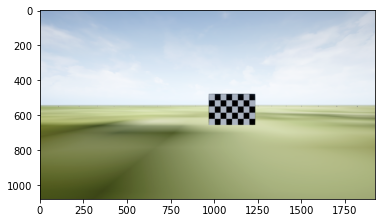

In [10]:
plt.imshow(list_chess_images[6])
# Попробовать с картинокй под углом или под 90 градусов или взять картинки из гайда 

In [11]:
world_data = pd.read_table(path_word_data,delimiter=" ",header=0, index_col=False,names = ["i","X","Y","type"],
              dtype={"i": np.int64, 'X': np.float32, "Y": np.float32,"orientation":np.str_})

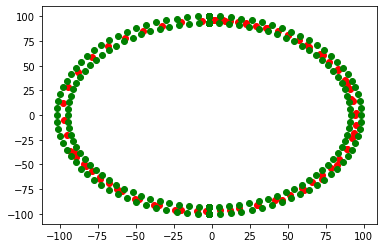

In [12]:
plt.plot(world_data.X,world_data.Y,'o',c="green")
plt.scatter(position_lidar.X,position_lidar.Y,c="red")


In [13]:
world_data.query("type=='left'")

,i,X,Y,type
0,1,-8.334544,-92.763046,left
1,2,-14.935279,-92.053398,left
2,3,-21.468571,-90.874657,left
3,4,-27.901127,-89.232841,left
4,5,-34.200169,-87.136330,left
...,...,...,...,...
144,145,24.501127,-89.232841,left
145,146,18.068571,-90.874657,left
146,147,11.535279,-92.053398,left
147,148,4.934544,-92.763046,left


In [14]:
chess_board_positions = pd.read_table(path_chess_board_pos,delimiter=" ",header=0, index_col=False,names = ["X","Y","Z"],
              dtype={'X': np.float32, "Y": np.float32,'Z': np.float32})
chess_board_positions

,X,Y,Z
0,4.7,0.762830,-0.902168
1,4.7,0.383446,-0.902168
2,4.7,0.036885,-0.902168
3,4.7,0.250778,-0.902168
4,4.7,0.949254,-0.902168
5,4.7,0.762830,-0.630793
6,4.7,0.383446,-0.630793
7,4.7,0.036885,-0.630793
8,4.7,0.250778,-0.630793
9,4.7,0.949254,-0.630793


In [15]:
chess_board_positions.shape[0]

25

In [200]:
assert chess_board_positions.shape[0]==len(list_chess_images),"Size not equal"

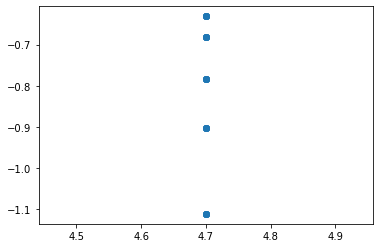

In [201]:
plt.scatter(chess_board_positions.X,chess_board_positions.Z)

(array([[ 14, 160, 234],
       [157,  65,  14],
       [158, 105, 215],
       [191,   0, 255]], dtype=uint8), array([1034144,     545, 1038183,     728], dtype=int64))
[[-1.14259453e-01 -4.08057681e-01  2.81141316e+02]
 [-1.18194764e-01  1.85991847e-03  1.11310933e+02]
 [-1.37311646e-04 -1.54704892e-03  1.00000000e+00]]


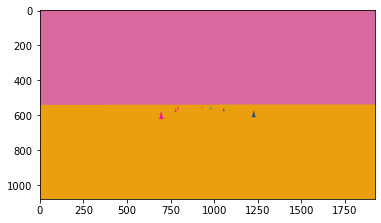

In [202]:
index = 10#35
img = (images[index,:,:,]*255).astype(np.uint8)
plt.imshow(img)
# Для котнтроля опорных цветов 
print(np.unique(cv2.cvtColor(img,cv2.COLOR_BGR2RGB).reshape(-1, img.shape[2]), axis=0,return_counts=True))
cameraDataProccesing = CameraDataProccesing(True,0)
lidar_data_proccesing = LidarDataProccesing(False)
fov_r = np.radians(120)
dov = 16
# PinholeCamera
X = [880.0,380.0,380.0,880.0]
Y = [-80.0,-10.0,10.0,100.0]
x = [894.0,916.0,1000.0,1039.0]
y = [622.0,866.0,895.0,621.0]
control_points = (X,Y,x,y)
pinholeCamera = PinholeCamera(control_points,True)

In [203]:
# Калибровка камеры по результатам нескольких наблюдение Такаси алгоритм 
# Поменять коодинаты!!!!!!!!!
objp_x = np.arange(2.5+10,77.5,10,)
objp_y = np.arange(-15+10,35,10)
objp = np.zeros((4*7,3), np.float32)
objp[:,:2] = np.array(np.meshgrid(objp_x,objp_y)).T.reshape(-1,2)


In [204]:
BOARD_SIZE = (7,4)
BOARD_SIZE_UE4 = (75,50)
dy = BOARD_SIZE_UE4[0]/BOARD_SIZE[0]
dz = BOARD_SIZE_UE4[1]/BOARD_SIZE[1]
def get_check_board_pose(chess_board_position,inner=True):
    y0 = chess_board_position[0] *100- BOARD_SIZE_UE4[0]/2
    z0 = -chess_board_position[1]*100 - BOARD_SIZE_UE4[1]/2
    objp_y = [y0+dy*i for i in range(1,BOARD_SIZE[1]+1)]#np.arange(2.5+10,77.5,10,)
    objp_z = [z0+dz*i for i in range(1,BOARD_SIZE[0]+1)]
    objp = np.zeros((BOARD_SIZE[0]*BOARD_SIZE[1],3), np.float32)
    objp[:,:2] = np.array(np.meshgrid(objp_y,objp_z)).T.reshape(-1,2)
    return objp.copy()

In [205]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
#objp = np.zeros((4*7,3), np.float32) # Пока так 
#objp[:,:2] = np.mgrid[0:4,0:7].T.reshape(-1,2)
#Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
ind_images = []

In [206]:
11212
for i,frame,obj_pos in zip(range(len(list_chess_images)),list_chess_images,chess_board_positions.values[:,[1,2]]):
    img_buf = frame.copy()
    gray = cv2.cvtColor(img_buf,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, BOARD_SIZE, 
                                             cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    if ret == True:# and corners.shape[0]>6:
        objp = get_check_board_pose(obj_pos)
        objpoints.append(objp)
        # уточнение координат пикселей для заданных 2d точек.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        ind_images.append(i)
        imgpoints.append(corners2)
        # Нарисовать и отобразить углы
        img_buf = cv2.drawChessboardCorners(img_buf, BOARD_SIZE, corners2, ret)
        cv2.imshow('img',img_buf)
        cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [207]:
ind_images

[0]

In [208]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print("rvecs : \n")
print("tvecs : \n")

Camera matrix : 

[[2.36399391e+03 0.00000000e+00 8.57928685e+02]
 [0.00000000e+00 3.14756038e+03 4.94872356e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

rvecs : 

tvecs : 



In [209]:
tvecs[0]

array([[260.2687947 ],
       [119.88486591],
       [953.77771748]])

In [210]:
np.degrees(np.linalg.norm(rvecs[0]))

179.93325176258278

In [211]:
ind_images[0]

0

In [212]:
mean_error = 0
total_errors = []
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
    total_errors.append(mean_error/(i+1))
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.0219626583440475


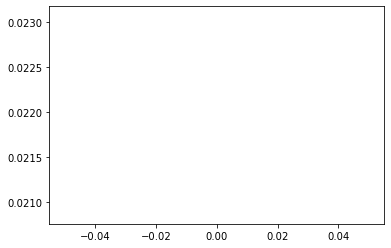

In [213]:
plt.plot(total_errors)

In [214]:
h,  w = images[0].shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [215]:
mtx

array([[2.36399391e+03, 0.00000000e+00, 8.57928685e+02],
       [0.00000000e+00, 3.14756038e+03, 4.94872356e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [216]:
pinholeCamera.set_homogeneous_matrix(mtx)

[[2.36399391e+03 0.00000000e+00 8.57928685e+02]
 [0.00000000e+00 3.14756038e+03 4.94872356e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [217]:
# получить точки дуги радиуса r с углом phi с углом alpha(в радианах) относительно OX в точке (x0,y0)
def get_arc_pnts(r,phi, alpha ,x0,y0,N=100):
    # начальная точка 
    arc_pnts = [[x0,y0]]
    # первый край
    arc_pnts.append([x0+r*np.cos(alpha-phi/2),y0+r*np.sin(alpha-phi/2)])
    # дуга 
    theta = np.linspace(alpha-phi/2,alpha+phi/2,num=N)
    arc_pnts = arc_pnts+[[x0+r*np.cos(t),y0+r*np.sin(t)] for t in theta]
    # второй край
    arc_pnts.append([x0+r*np.cos(alpha+phi/2),y0+r*np.sin(alpha+phi/2)])
    # возвращаемся
    
    arc_pnts.append(arc_pnts[0])
    return np.array(arc_pnts)
# отобрать все точки, которые входят в данный сектор радиуса r и углом phi и направлением alpha   
def find_in_contour(points,arc_pnts,r,phi,x0,y0,alpha,epsilon_1=10**(-3),epsilon_2=10**(-3)):
    # 2 точка и предпоследняя это границы, тогда вектор направления
    arc_pnts_ = arc_pnts
    xd2 = (arc_pnts_[1][0]+arc_pnts_[-2][0])/2
    yd2 = (arc_pnts_[1][1]+arc_pnts_[-2][1])/2
    direct_vec = [xd2,yd2]
    # по расстоянию
    print(direct_vec)
    inds_r = np.where(np.linalg.norm(points-arc_pnts[0],axis=1) <=r*(1+epsilon_1))
    points_ir = points[inds_r]
    # по углу
    angles = np.arccos(np.matmul(points_ir-arc_pnts[0],direct_vec-arc_pnts[0])
                       /(np.linalg.norm(points_ir - arc_pnts[0],axis=1)*np.linalg.norm(direct_vec-arc_pnts[0])))
    # & поэлеиентное и and сравнивает весь 
    ind_a = np.where((angles<=phi*(epsilon_2+1)/2)&(-phi*(epsilon_2+1)/2<=angles))
    points_a = points_ir[ind_a] 
    return points_a, [inds_r,ind_a]

In [218]:
def rotate_point(cx,cy,angle,p):
    s = np.sin(angle)
    c = np.cos(angle)
    # translate point back to origin:
    x, y = p 
    x -= cx
    y -= cy
    # rotate point
    xnew = x * c - y * s
    ynew = x * s + y * c
    # translate point back:
    x = xnew + cx
    y = ynew + cy
    return [x,y]
def circle(r,eps):
    theta = np.linspace(np.pi*1.5, (1.5 + 10**eps)*np.pi, 100)
    x = r*np.cos(theta)
    y = r +r*np.sin(theta)
    return x,y

In [219]:
%time
# Разделили на картинке левые и правые конусы(они отличаются по цвету)
img_HSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_tresh_low,img_tresh_high = cameraDataProccesing.color_clustering(img_HSV)
# Получаем прямоугольники, ограничивающие контуры 
cntr_ps_low, bounding_rects_low, cones_low =cameraDataProccesing.get_bounding_rect(img_tresh_low,False)
cntr_ps_high, bounding_rects_high, cones_high =cameraDataProccesing.get_bounding_rect(img_tresh_high,False)
# Берем только первые две пары передних 
max_area_ind = lambda cones: np.argmax(list(map(lambda ch:cv2.contourArea(ch),cones)))
n_max_area_ind = lambda cones: np.flip(np.argsort(list(map(lambda ch:cv2.contourArea(ch),cones))))[0:2]

ind_low =n_max_area_ind(cones_low)
ind_high =n_max_area_ind(cones_high)

cntr_ps = []
for ind in ind_low:
    #contur1 = np.append(cones_low[ind], [cones_high[ind][0]], axis=0)
    contur1 = cones_low[ind]
    cntr_ps.append([contur1[:, :, 0].mean(), contur1[:, :, 1].mean()])
    #cntr_ps.append((cntr_ps_low[ind]))
for ind in ind_high:
    #contur1 = np.append(cones_high[ind], cones_high[ind][0], axis=0)
    contur1 = cones_high[ind]
    cntr_ps.append([contur1[:, :, 0].mean(), contur1[:, :, 1].mean()])
    #cntr_ps.append((cntr_ps_high[ind]))

cntr_ps = np.array(cntr_ps)
# Используя опорные цвета сегментации AirSim  ставим метки. Нужен для SVM
labels = cameraDataProccesing.get_label(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),cntr_ps)

# lidar_data_proccesing 
#lidar_data_proccesing.plot_disntane_function(lidar_data[index])
cone_center,dist = lidar_data_proccesing.get_cone_info(lidar_data[index])
approx_cone_center = lidar_data_proccesing.approx_data(cone_center)
#lidar_data_proccesing.visulation_cone(approx_cone_center)


# PinholeCamera
space_cooord = []
for pnt in cntr_ps:
    coord = pinholeCamera.get_spaces_coord(pnt)/100
    #coord = rotate_point(0,0,0*orientation.Z[index],coord)
    coord = [coord[0],coord[1] -0*230/100]
    # print(coord)
    space_cooord.append(coord)
    
# SVM
Y_train = labels
X_train = space_cooord[0:len(Y_train)]
X_test = approx_cone_center

from sklearn import svm

C = 1.0  # = self._alpha in our algorithm
model1 = svm.SVC(kernel='linear', C=C)
#model1 = svm.LinearSVC(C=C, max_iter=10000)
#model1 = svm.SVC(kernel='rbf', gamma=0.7, C=C)
# model1 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)

model1.fit(X_train, Y_train)
y_predict = model1.predict(X_test)

# Выбираем только те точки, которые находятся в конусе видимости
orientation  = position_lidar.iloc[index][['Roll','Pitch','Yaw']]
yaw = orientation.Yaw
# Так как данные lidar в локальных координатах 
x0 = 0
y0 = 0
arc_pnts = get_arc_pnts(dov,fov_r, yaw ,x0,y0)
print(approx_cone_center.shape)

# approx_cone_center_0 = approx_cone_center[y_predict==0]
# approx_cone_center_1 = approx_cone_center[y_predict==1]
approx_cone_center_in,inds = find_in_contour(approx_cone_center,arc_pnts,dov,fov_r,x0,y0,yaw)
y_predict =y_predict[inds[0]][inds[1]]
# approx_cone_center_0_in = find_in_contour(approx_cone_center_1,arc_pnts,dov,fov_r,x0,y0,yaw)
# approx_cone_center_1_in = find_in_contour(approx_cone_center,arc_pnts,dov,fov_r,x0,y0,yaw)

# distance_0 = lidar_data_proccesing.calculate_distance_cones(approx_cone_center_0_in)
# distance_1 =lidar_data_proccesing.calculate_distance_cones(approx_cone_center_1_in)

# Находим оптимальный угол поворота
from scipy.optimize import minimize
def objective(Nt,pnts,r):
    # v = 0
    # for pnt in pnts:
    #     v = v + ((pnt[0]**2 + (pnt[1]-r)**2)**(1/2)-r)**2
    
    return -np.sum((pnts[:,0]**2  + ((pnts[:,1]-r)**2)**(1/2) - r)**2)
ff = lambda r: objective(approx_cone_center_in.shape[0],approx_cone_center_in,r)
result = minimize(ff, 2, method='nelder-mead')
print(result.x)
print(f"Оптимальный угол поворота {np.arctan(2.6/(result.x+1/2))}")

Wall time: 0 ns
(7, 2)
[7.46847732247842, -2.8673762368453826]
[-1.2676506e+29]
Оптимальный угол поворота [-2.05103835e-29]


(-1447.7842345431015,
 30403.46892540513,
 -971.9286040320353,
 20062.831199552555)

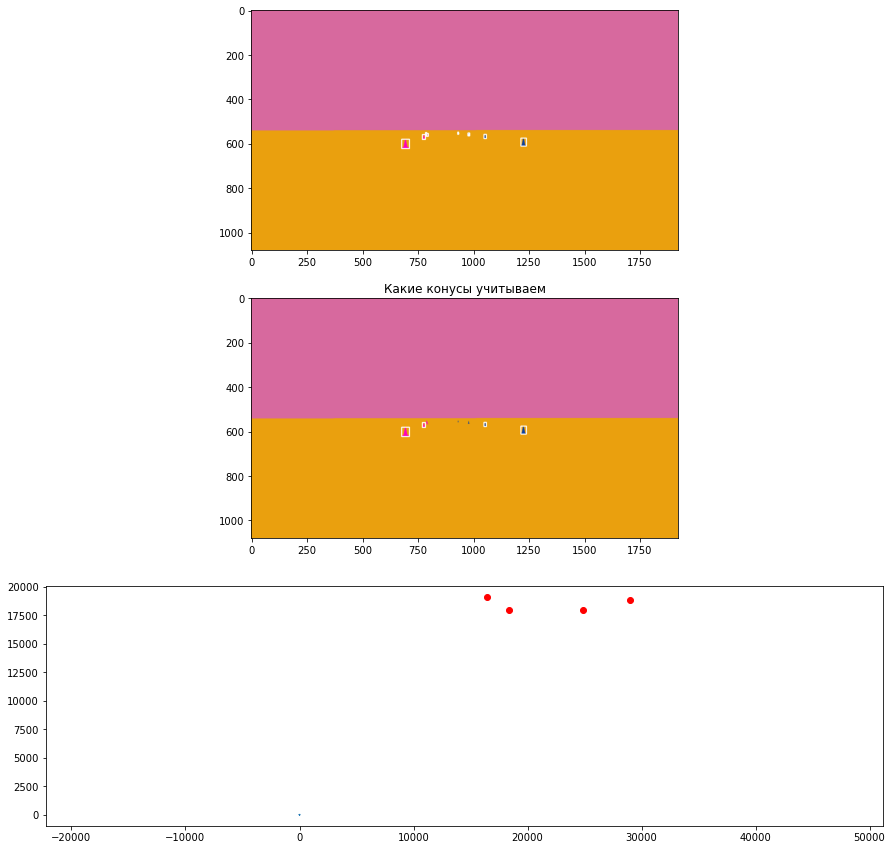

In [220]:
f, axes = plt.subplots(nrows=3, ncols=1,figsize=(15,15))
img_res = img.copy()
img_res_front = img.copy()
for i in range(len(bounding_rects_low)):
    rect =bounding_rects_low[i]
    cv2.rectangle(img_res, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)
    if i in ind_low:
        cv2.rectangle(img_res_front, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)   
        
        
for i in range(len(bounding_rects_high)):
    rect =bounding_rects_high[i]
    cv2.rectangle(img_res, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)
    if i in ind_high:
        cv2.rectangle(img_res_front, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)  
        
axes[0].imshow(img_res)
axes[1].imshow(img_res_front)
axes[1].set_title("Какие конусы учитываем")


for pnt in space_cooord:
    axes[2].scatter(pnt[0],pnt[1], c = "red")
axes[2].plot(arc_pnts[:,0],arc_pnts[:,1])
axes[2].axis('equal')

In [221]:
pose_car = position_lidar.iloc[index][['X','Y']]

In [222]:
# Найдем все точки, которые лежат внутри окружности 
cones_world = world_data.query("(X-@pose_car[0])**2+(Y-@pose_car[1])**2<=15**2")
cones_lidar = lidar_data[index]
orientation  = position_lidar.iloc[index][['Roll','Pitch','Yaw']]

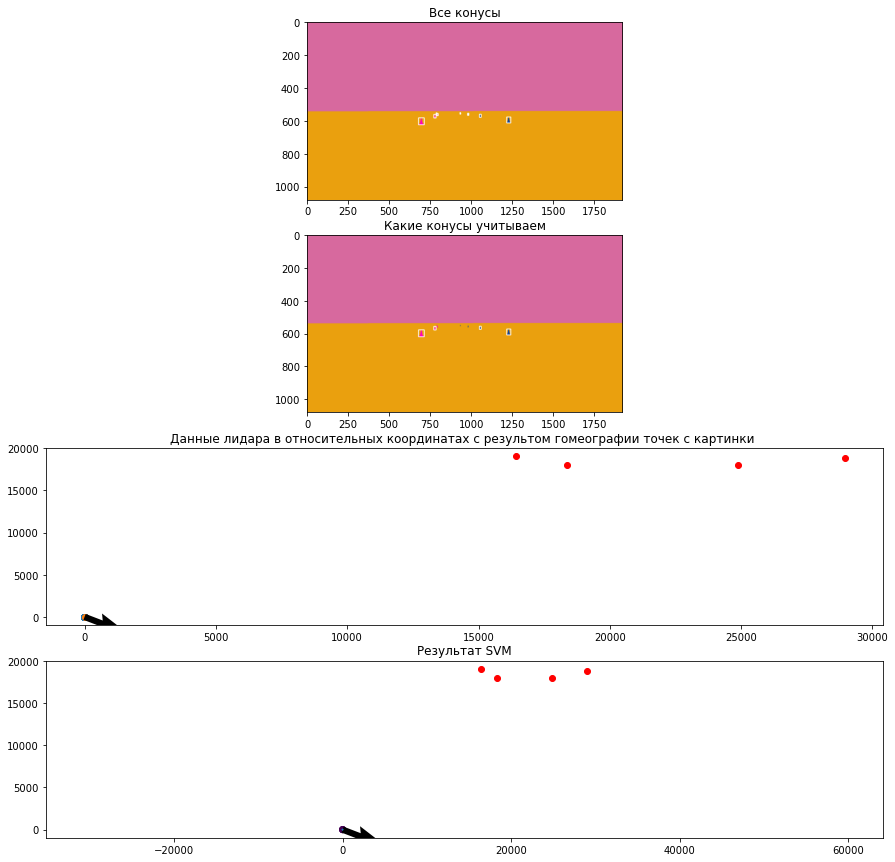

In [223]:
f, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,15))
img_res_front = img.copy()
img_res = img.copy()
for i in range(len(bounding_rects_low)):
    rect =bounding_rects_low[i]
    cv2.rectangle(img_res, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)
    if i in ind_low:
        cv2.rectangle(img_res_front, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)   
        
        
for i in range(len(bounding_rects_high)):
    rect =bounding_rects_high[i]
    cv2.rectangle(img_res, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)
    if i in ind_high:
        cv2.rectangle(img_res_front, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255, 255,255), 3)  
        
#yaw = position_lidar.yaw[index]
new_x = np.cos(yaw)
new_y = np.sin(yaw)
axes[0].imshow(img_res)
axes[0].set_title("Все конусы")

axes[1].imshow(img_res_front)
axes[1].set_title("Какие конусы учитываем")

axes[2].scatter(lidar_data[index][0,:],lidar_data[index][1,:])
#axes[2].scatter(s)
axes[2].scatter(0,0)
axes[2].quiver(0,0,new_x,new_y)
for pnt in space_cooord:
    axes[2].scatter(pnt[0],pnt[1], c = "red")
axes[2].set_title("Данные лидара в относительных координатах c результом гомеографии точек с картинки ")

#axes[2].set_xlim((-15, 15))
#axes[2].set_ylim((-15, 15))
#axes[3].set_xlim((-15, 15))
#axes[3].set_ylim((-15, 15))
for pnt in space_cooord:
    axes[3].scatter(pnt[0],pnt[1], c = "red")
#axes[3].scatter(lidar_data[index][0,:],lidar_data[index][1,:])
axes[3].scatter(approx_cone_center_in.T[0,:],approx_cone_center_in.T[1,:],c=y_predict)
axes[3].axis("equal")
#yaw = orientation.Z[index]
#axes[3].fill([0,20,20,0],[0,10*np.tan(np.radians(60)),10*np.tan(np.radians(-60)),0] , color="cyan", alpha = 0.15)
axes[3].plot(arc_pnts[:,0],arc_pnts[:,1])
axes[3].quiver(0,0,new_x,new_y)
axes[3].set_title("Результат SVM")
None


In [224]:
lidar_data[index]

array([[  1.9166673 ,   2.3378377 ,   2.7576487 , ...,  -5.422388  ,
         -5.450535  ,  -5.4752817 ],
       [-16.750895  , -16.700605  , -16.6398    , ...,   1.1909214 ,
          1.0541296 ,   0.9166372 ],
       [  0.98199487,   0.98218423,   0.9823731 , ...,   0.9789051 ,
          0.97889096,   0.9788783 ]], dtype=float32)

In [225]:
lidar_data[index][:,np.where(np.linalg.norm(lidar_data[index],axis=0)<16)]

array([[[ 8.750323  , 15.160078  ,  9.65665   , ..., -5.422388  ,
         -5.450535  , -5.4752817 ]],

       [[-3.1949449 , -4.271156  ,  3.5714219 , ...,  1.1909214 ,
          1.0541296 ,  0.9166372 ]],

       [[ 0.5425565 ,  0.9173479 ,  0.5996702 , ...,  0.9789051 ,
          0.97889096,  0.9788783 ]]], dtype=float32)

In [226]:
lidar_data[index][:,[2,3]]

array([[  2.7576487 ,   3.1759334 ],
       [-16.6398    , -16.568253  ],
       [  0.9823731 ,   0.98256147]], dtype=float32)

In [17]:
cones = []
for pnt in lidar_data[index].T:
    if (6<np.linalg.norm(pnt) and np.linalg.norm(pnt)<16) or (5>np.linalg.norm(pnt)):
        cones.append(pnt)
cones = np.array(cones)

Text(0.5, 1.0, 'Данные после обработки ')

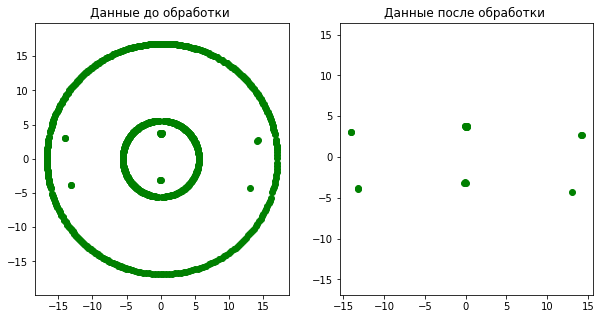

In [34]:
index = 12
f, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
axes[0].plot(lidar_data[index ][0,:],lidar_data[index ][1,:],'o',c='g')
axes[0].plot(0,0)
axes[0].axis('equal')
axes[0].set_title("Данные до обработки ")
axes[1].plot(cones[:,0],cones[:,1],'o',c='g')
axes[1].plot(0,0)
axes[1].axis('equal')
axes[1].set_title("Данные после обработки ")

Text(0.5, 1.0, 'Данные лидара после примения SVM ')

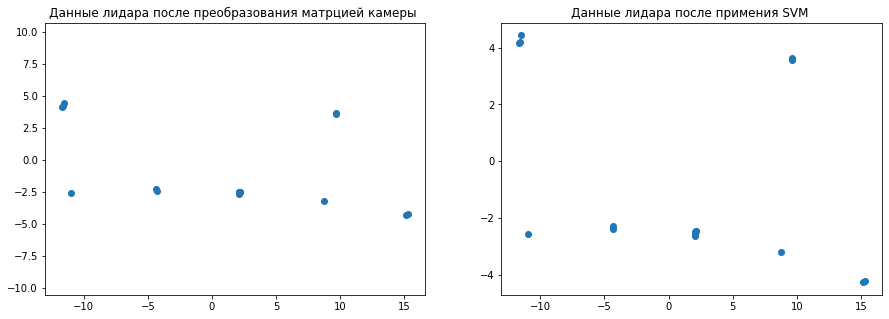

In [241]:
f, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
axes[0].plot(cones[:,0],cones[:,1],'o')
axes[0].plot(0,0)
axes[0].axis('equal')
axes[0].set_title("Данные лидара после преобразования матрцией камеры ")
axes[1].plot(cones[:,0],cones[:,1],'o')
axes[1].plot(0,0)
axes[1].set_title("Данные лидара после примения SVM ")

In [174]:
lidar_data[1].shape

(3, 590)

In [109]:
cones_in[:,np.where(np.linalg.norm(cones_in,axis=0)>4)]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [46]:
index

[]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 4

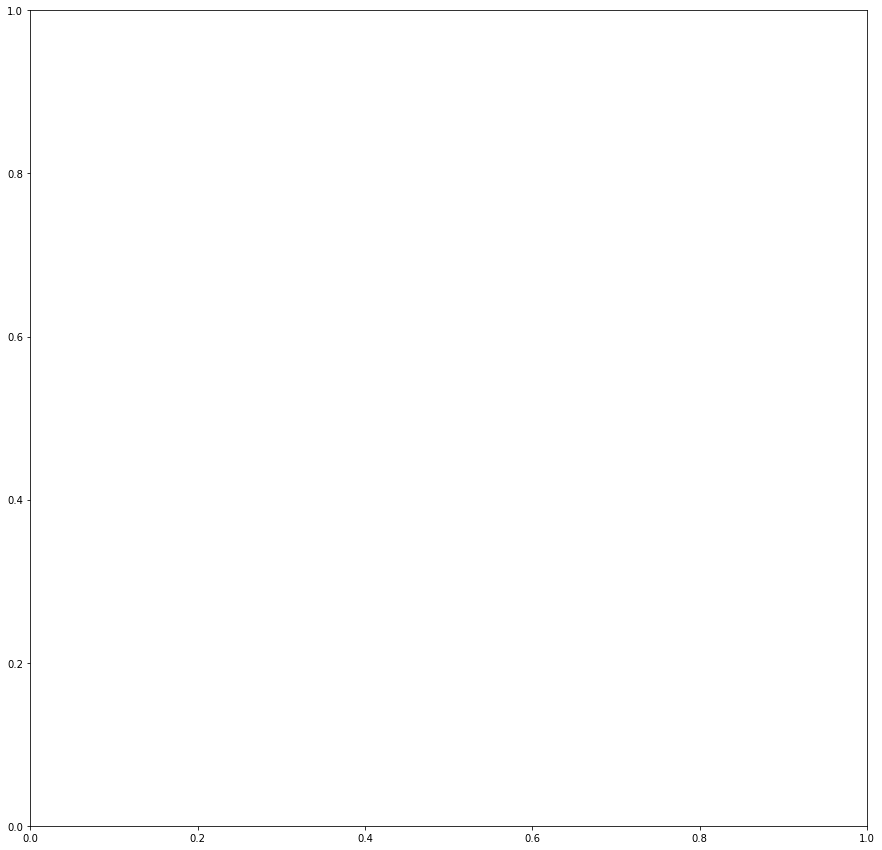

In [33]:
f, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,15))
for pnt,dist in zip(approx_cone_center[y_predict==0],distance_0):
    axes.plot([pnt[0],0],[pnt[1],0],c="red",label = str(dist))
for pnt,dist in zip(approx_cone_center[y_predict==1],distance_1):
    axes.plot([pnt[0],0],[pnt[1],0],c="yellow",label = str(dist))
axes.set_title("Расстояния до конусов и оптимальная дуга поворота")
axes.legend()

#x1,y1 = circle(result.x[0],0)
x2,y2 = circle(1/np.tan(-1),0.001)
x3,y3 = circle(1/np.tan(1),0.001)
#axes.plot(x1, -y1, color="blue",label = "оптимальная дуга поворота")
axes.plot(-x2, y2,color = "green",label = "Минимальный радиус в airsim")
axes.plot(x3, y3, color = "cyan", label = "Максимальный радиус в airsim")
axes.legend()

In [ ]:
# + угол обзора ПОЛОЖЕНИЯ ВСЕХ КОНУСОВ 

In [ ]:
# вся трасса изветсна
# Центр тяжело найти ->PID -

In [ ]:
a = np.array([[1,2,3,4,5,6],[11,12,13,14,15,16]]).T

In [ ]:
a[:,0]

In [ ]:
#f = lambda x : np.sin(x)
x = np.linspace(0,10)

In [ ]:
plt.plot(x,np.arctan(2.6/(np.array(list(map(ff,x)))+1/2)))